In [1]:
%matplotlib inline
import numpy as np
import rdkit.Chem as Chem
from rdkit.Chem import AllChem
import csv
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_predict
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import f1_score

In [2]:
def smiles_to_fps(smiles, fp_radius, fp_length):
    """This function converts an array of SMILES to an array of Morgan fingerprints"""
    fps = np.array([smile_to_fp(s, fp_radius, fp_length) for s in smiles])  # get the bit strings
    return np.array([list(fp) for fp in fps], dtype=int)  # convert the bit strings to integer arrays


def smile_to_fp(s, fp_radius, fp_length):
    """This function converts SMILES to Morgan fingerprints"""
    mol = Chem.MolFromSmiles(s)  # get molecule object
    return (AllChem.GetMorganFingerprintAsBitVect(  # get fingerprint
        mol, fp_radius, nBits=fp_length)).ToBitString()  # convert it to bit string for speed


def read_csv(filename, input_name, target_name):
    """This function reads a csv file with an input column and a target column"""
    x = []  # SMILES
    y = []  # enzyme class
    with open(filename) as file:
        reader = csv.DictReader(file)
        for row in reader:
            x.append(row[input_name])
            y.append(int(row[target_name]))
    return np.array(x), np.array(y)


# read csv file
x, y = read_csv('pdb_data_protein_mc.csv', 'smiles', 'class')

# convert SMILES to Morgan fingerprints (ECFP4)
X = smiles_to_fps(x, 2, 8192)

In [3]:
# number of trees
estimators = list(range(10, 100, 10)) + list(range(100, 1000, 100)) + list(range(1000, 2001, 200))

In [4]:
# scores for each case
scores_f1 = []
for val in estimators:
    clf = ExtraTreesClassifier(n_estimators=val, class_weight="balanced", n_jobs=-1, random_state=999)
    scores_f1.append(f1_score(y, cross_val_predict(clf, X, y, cv=5, n_jobs=-1), average="weighted"))
    print(scores_f1[-1])

0.670171998611171
0.6920857691520932
0.697540736702738
0.6999567683204434
0.7024903997934041
0.7022454619475179
0.7026141302742512
0.7037881806241054
0.7042631712930414
0.704742282116983
0.7061690094440615
0.7067436014606282
0.7070462851296577
0.7068305832730372
0.7072568716366777
0.7081332026295055
0.7080366323266469
0.7076389539112765
0.707718859208179
0.7079768867046122
0.708546493024425
0.7085615952321677
0.7078179260882045
0.7083813939020815


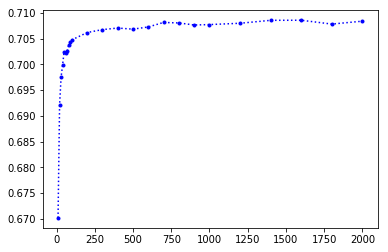

In [5]:
# plot the scores against the number of estimators
plt.figure(0)
plt.plot(estimators, scores_f1, 'b.:')
plt.show()

In [6]:
# experimenting with max features
args = [{'n_estimators':700, 'class_weight':'balanced', 'max_features':'sqrt'},
        {'n_estimators':700, 'class_weight':'balanced', 'max_features':'log2'}]

In [7]:
scores_f1 = []
for arg in args:
    clf = ExtraTreesClassifier(**arg, n_jobs=-1, random_state=999)
    preds = cross_val_predict(clf, X, y, cv=5, n_jobs=-1)
    scores_f1.append(f1_score(y, preds, average="weighted"))
    print(scores_f1[-1])

0.7081332026295055
0.7116057476421278
